## Install all the required packages first

In [1]:
#install.packages('IRkernel') 
# install.packages("rlang", type="binary",dependencies = TRUE)
# install.packages("magrittr", type="binary",dependencies = TRUE) # package installations are only needed the first time you use it
# install.packages("dplyr", type="binary",dependencies = TRUE)    # alternative installation of the %>%
# install.packages("tidyquant", type="binary",dependencies = TRUE)
# install.packages("lubridate", type="binary",dependencies = TRUE)
# install.packages("PerformanceAnalytics", type="binary",dependencies = TRUE)
# install.packages("xts", type="binary",dependencies = TRUE)
# install.packages("ggplot2", type="binary",dependencies = TRUE)
# install.packages("broom", type="binary",dependencies = TRUE)
# install.packages("tidyverse", type="binary",dependencies = TRUE)
# install.packages('timetk', type="binary",dependencies = TRUE)

In [2]:
# remove.packages("rlang")
# install.packages("magrittr") # package installations are only needed the first time you use it
# install.packages("dplyr")    # alternative installation of the %>%
# install.packages("tidyquant")
# install.packages("lubridate")
# install.packages("PerformanceAnalytics")
# install.packages("xts")
# install.packages("ggplot2")
# install.packages("broom")
# install.packages("tidyverse")
# install.packages("timetk")

## load the required packages

In [20]:
# library(rlang)
library(magrittr) # needs to be run every time you start R and want to use %>%
library(ggplot2)
library(dplyr)    # alternatively, this also loads %>%
library(tidyquant)
library(tidyverse)
library(lubridate)
library(PerformanceAnalytics)
library(xts)
library(timetk)

## Function to evalute the portfolio return based on the indecies and corresponding weights

In [4]:
portfolio_return <- function(Indecies, wts){
    stock_prices <- tq_get(Indecies , get  = "stock.prices")
    stock_returns_monthly <- stock_prices %>% group_by(symbol) %>% tq_transmute(select = adjusted,mutate_fun = periodReturn, period     = "monthly", col_rename = "Ra")
    portfolio_returns_monthly <- stock_returns_monthly %>% tq_portfolio(assets_col  = symbol, returns_col = Ra, weights = wts, col_rename  = "Ra")
    return(portfolio_returns_monthly)
}

## Function to plot the return, and estimate cumulative return, and current investment

In [5]:
portfolio_cum_return <- function(portfolio_returns_monthly, Initial_investment){
    portfolio_returns_monthly<- portfolio_returns_monthly[order(portfolio_returns_monthly$date),]
    #create an xts dataset  
    All.dat <- xts(portfolio_returns_monthly[,-1], order.by = portfolio_returns_monthly$date) 
    #Calculate Compound Return for the fund across all the data  
    Return.cumulative(All.dat$Ra,geometric = TRUE) 
    cum_ret <- Return.cumulative(All.dat$Ra,geometric = TRUE)[1]
    p.plot <- chart.CumReturns(All.dat$Ra,wealth.index = FALSE, geometric = TRUE)  
    current_investment = Initial_investment * (1+cum_ret) 
    return(c(p.plot, cum_ret, current_investment))
}

In [6]:
Initial_investment = 10000

# Factor-based Strategy

Warning message in PerformanceAnalytics::Return.portfolio(., weights = weights, :
"NA's detected: filling NA's with zeros"


[[1]]

[[2]]
[1] 2.11694

[[3]]
[1] 31169.4


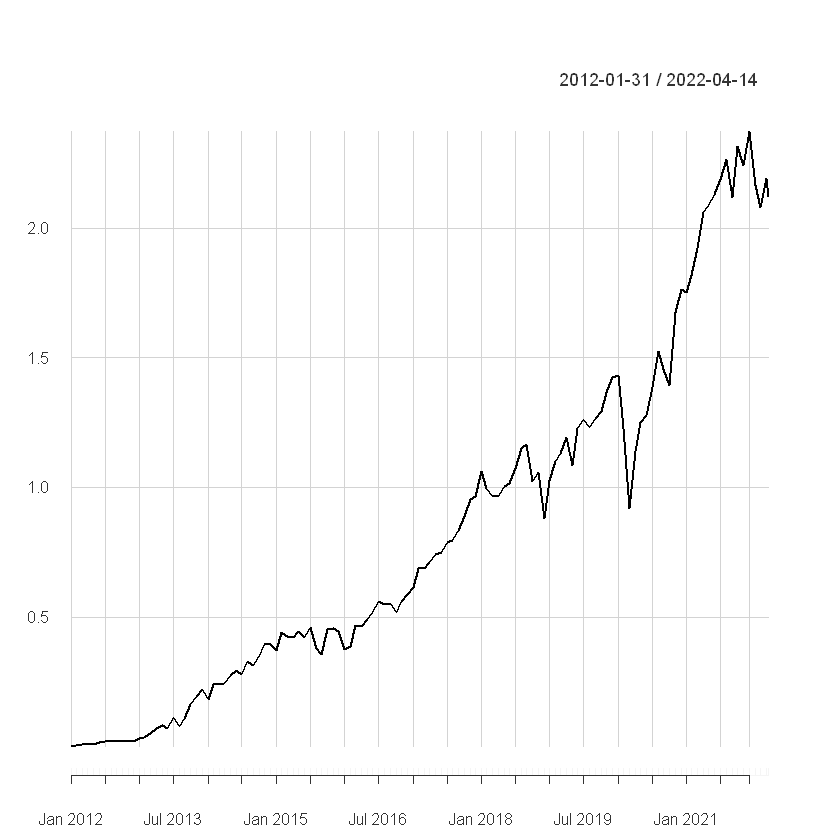

In [7]:
Indecies <- c("SIZE","VLUE","MTUM","USMV","QUAL")
wts <- c(0.2, 0.2, 0.2, 0.2, 0.2)
res <- portfolio_return(Indecies, wts)
portfolio_cum_return(res, Initial_investment)

# Barbell Strategy

## Allocation  #1

Warning message in PerformanceAnalytics::Return.portfolio(., weights = weights, :
"NA's detected: filling NA's with zeros"


[[1]]

[[2]]
[1] 2.271236

[[3]]
[1] 32712.36


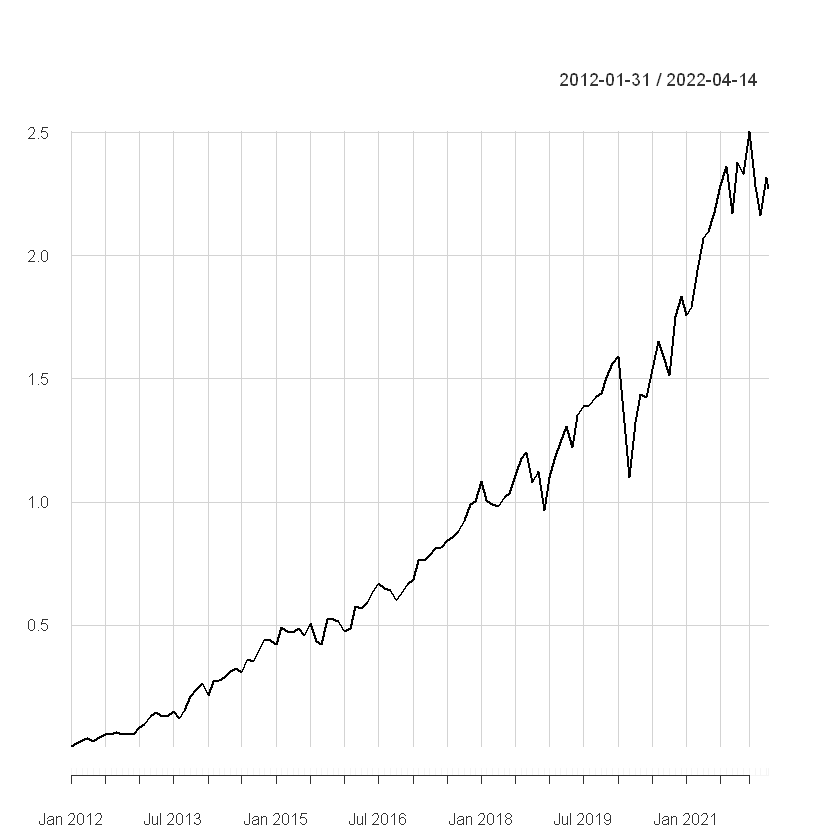

In [8]:
Indecies <- c("USMV","QUAL")
wts <- c(0.5, 0.5)
res <- portfolio_return(Indecies, wts)
portfolio_cum_return(res, Initial_investment)

In [9]:
stock_prices <- c("USMV","QUAL") %>%
  tq_get(get  = "stock.prices")
  
# stock_prices

library(tidyverse)
stock_returns_monthly <- stock_prices %>%
  group_by(symbol) %>%
  tq_transmute(select     = adjusted, 
               mutate_fun = periodReturn, 
               period     = "monthly", 
               col_rename = "Ra")

wts <- c(0.5, 0.5)

portfolio1_returns_monthly <- stock_returns_monthly %>%
  tq_portfolio(assets_col  = symbol, 
               returns_col = Ra, 
               weights     = wts, 
               col_rename  = "Ra")

Warning message in PerformanceAnalytics::Return.portfolio(., weights = weights, :
"NA's detected: filling NA's with zeros"


,Ra
Cumulative Return,2.271236


[1] 32712.36

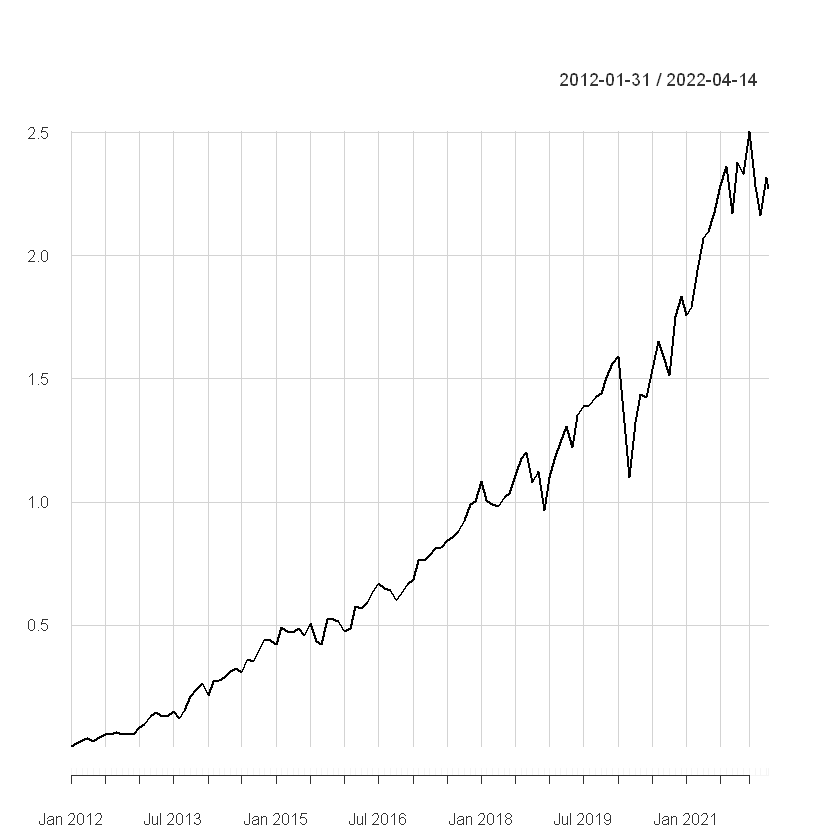

In [10]:
# portfolio1_returns_monthly$date <- mdy(portfolio1_returns_monthly$date) 
portfolio1_returns_monthly<- portfolio1_returns_monthly[order(portfolio1_returns_monthly$date),]
#create an xts dataset  
All.dat <- xts(portfolio1_returns_monthly[,-1], order.by = portfolio1_returns_monthly$date) 
#Calculate Compound Return for the fund across all the data  
Return.cumulative(All.dat$Ra,geometric = TRUE) 
cum_ret <- Return.cumulative(All.dat$Ra,geometric = TRUE)[1]
chart.CumReturns(All.dat$Ra,wealth.index = FALSE, geometric = TRUE)  
10000 * (1+cum_ret) 

## Allocation  #2

Warning message in PerformanceAnalytics::Return.portfolio(., weights = weights, :
"NA's detected: filling NA's with zeros"


[[1]]

[[2]]
[1] 1.051819

[[3]]
[1] 20518.19


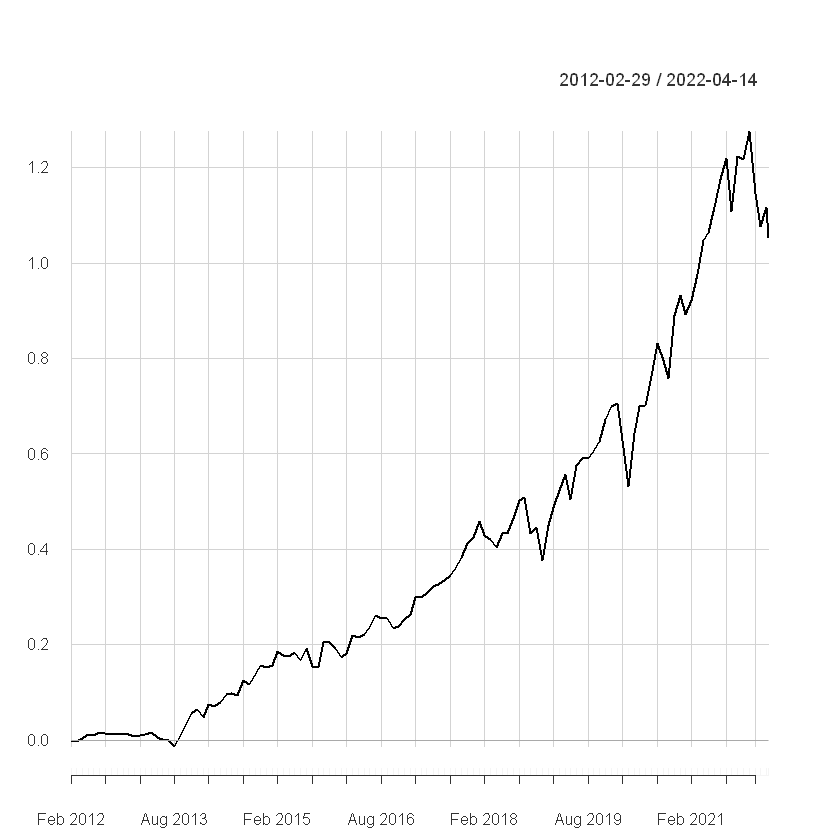

In [11]:
Indecies <- c("GOVT","QUAL")
wts <- c(0.5, 0.5)
res <- portfolio_return(Indecies, wts)
portfolio_cum_return(res, Initial_investment)

In [12]:
stock_prices <- c("GOVT","QUAL") %>%
  tq_get(get  = "stock.prices")
  
# stock_prices

library(tidyverse)
stock_returns_monthly <- stock_prices %>%
  group_by(symbol) %>%
  tq_transmute(select     = adjusted, 
               mutate_fun = periodReturn, 
               period     = "monthly", 
               col_rename = "Ra")

wts <- c(0.5, 0.5)

portfolio2_returns_monthly <- stock_returns_monthly %>%
  tq_portfolio(assets_col  = symbol, 
               returns_col = Ra, 
               weights     = wts, 
               col_rename  = "Ra")

Warning message in PerformanceAnalytics::Return.portfolio(., weights = weights, :
"NA's detected: filling NA's with zeros"


,Ra
Cumulative Return,1.05182


[1] 20518.2

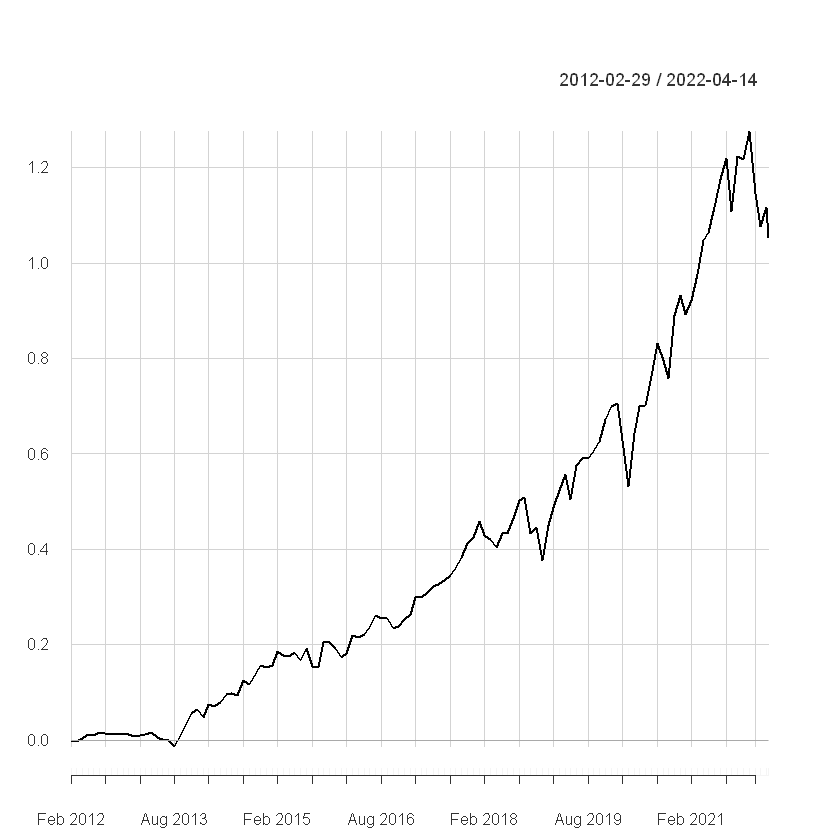

In [13]:
# portfolio1_returns_monthly$date <- mdy(portfolio1_returns_monthly$date) 
portfolio2_returns_monthly<- portfolio2_returns_monthly[order(portfolio2_returns_monthly$date),]
#create an xts dataset  
All.dat <- xts(portfolio2_returns_monthly[,-1], order.by = portfolio2_returns_monthly$date) 
#Calculate Compound Return for the fund across all the data  
Return.cumulative(All.dat$Ra,geometric = TRUE) 
cum_ret <- Return.cumulative(All.dat$Ra,geometric = TRUE)[1]
chart.CumReturns(All.dat$Ra,wealth.index = FALSE, geometric = TRUE)  
10000 * (1+cum_ret) 

## Allocation  #3

Warning message in PerformanceAnalytics::Return.portfolio(., weights = weights, :
"NA's detected: filling NA's with zeros"


[[1]]

[[2]]
[1] 10.24934

[[3]]
[1] 112493.4


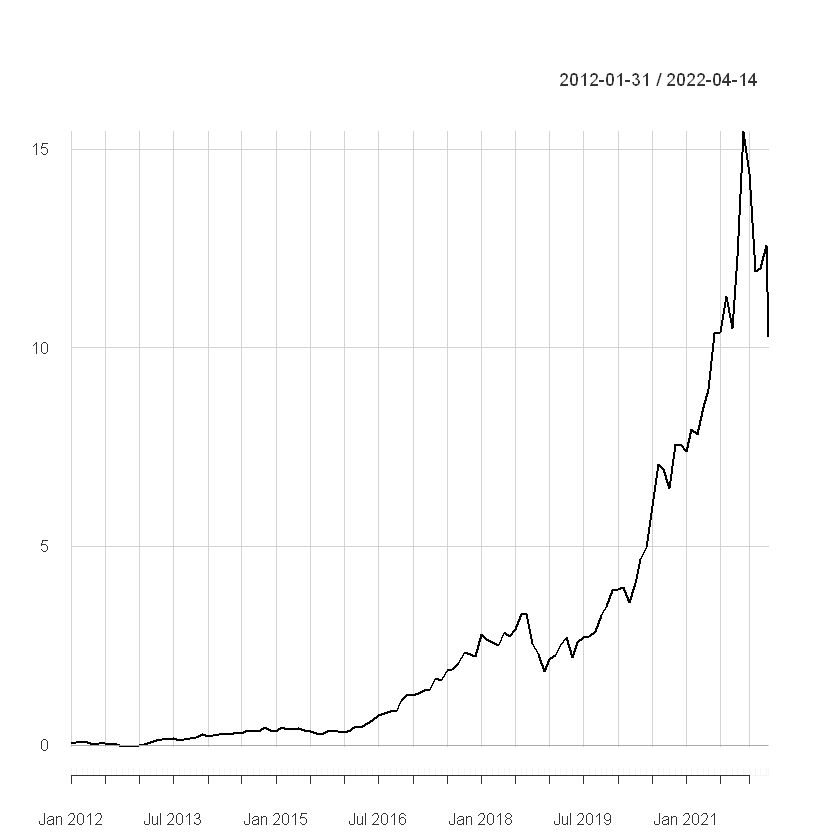

In [14]:
# https://www.marketwatch.com/story/here-are-the-most-and-least-volatile-stocks-among-the-sp-500-2019-01-29
# Most volatile stocks # verizon, walmart, Sysco Corp., Western Union Co., Coca-Cola Co.
# Least volatile stocks # Nvidia Corp., Lam Research Corp., AMD, Twitter Inc., Macy's Inc.
Indecies <- c("VZ","WMT","SYY","WU","KO","NVDA","LRCX","AMD","TWTR","M")
wts <- c(0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
res <- portfolio_return(Indecies, wts)
portfolio_cum_return(res, Initial_investment)

In [15]:
# https://www.marketwatch.com/story/here-are-the-most-and-least-volatile-stocks-among-the-sp-500-2019-01-29
# Most volatile stocks # verizon, walmart, Sysco Corp., Western Union Co., Coca-Cola Co.
# Least volatile stocks # Nvidia Corp., Lam Research Corp., AMD, Twitter Inc., Macy's Inc.
stock_prices <- c("VZ","WMT","SYY","WU","KO","NVDA","LRCX","AMD","TWTR","M") %>%
  tq_get(get  = "stock.prices")
  
# stock_prices

library(tidyverse)
stock_returns_monthly <- stock_prices %>%
  group_by(symbol) %>%
  tq_transmute(select     = adjusted, 
               mutate_fun = periodReturn, 
               period     = "monthly", 
               col_rename = "Ra")

wts <- c(0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)

portfolio3_returns_monthly <- stock_returns_monthly %>%
  tq_portfolio(assets_col  = symbol, 
               returns_col = Ra, 
               weights     = wts, 
               col_rename  = "Ra")

Warning message in PerformanceAnalytics::Return.portfolio(., weights = weights, :
"NA's detected: filling NA's with zeros"


,Ra
Cumulative Return,10.24934


[1] 112493.4

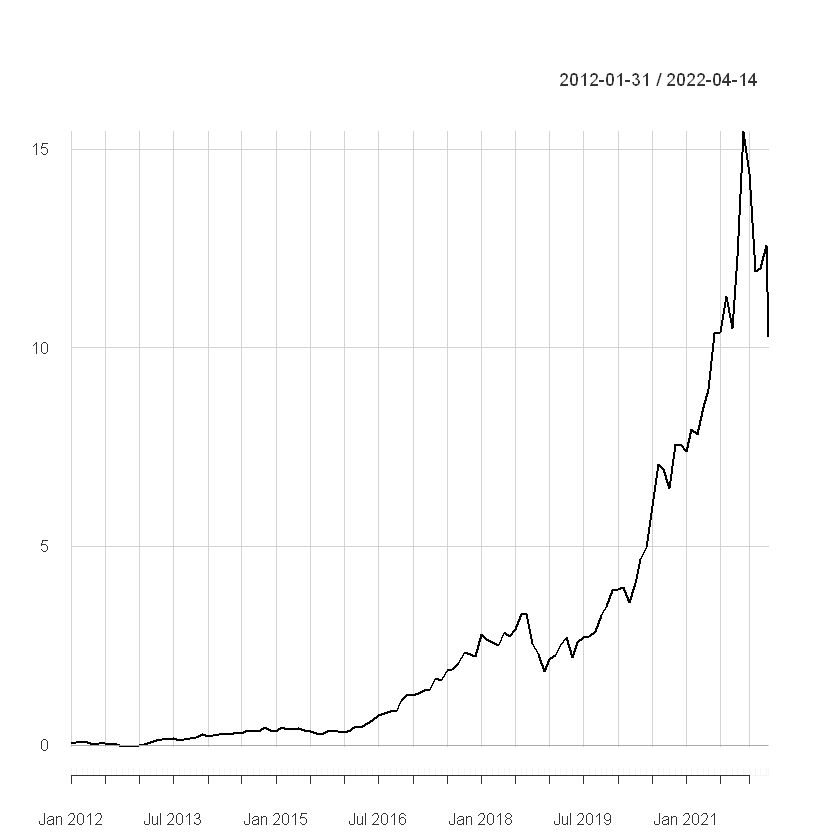

In [16]:
# portfolio1_returns_monthly$date <- mdy(portfolio1_returns_monthly$date) 
portfolio3_returns_monthly<- portfolio3_returns_monthly[order(portfolio3_returns_monthly$date),]
#create an xts dataset  
All.dat <- xts(portfolio3_returns_monthly[,-1], order.by = portfolio3_returns_monthly$date) 
#Calculate Compound Return for the fund across all the data  
Return.cumulative(All.dat$Ra,geometric = TRUE) 
cum_ret <- Return.cumulative(All.dat$Ra,geometric = TRUE)[1]
chart.CumReturns(All.dat$Ra,wealth.index = FALSE, geometric = TRUE)  
10000 * (1+cum_ret) 

# SP500

[[1]]

[[2]]
[1] 3.171382

[[3]]
[1] 41713.82


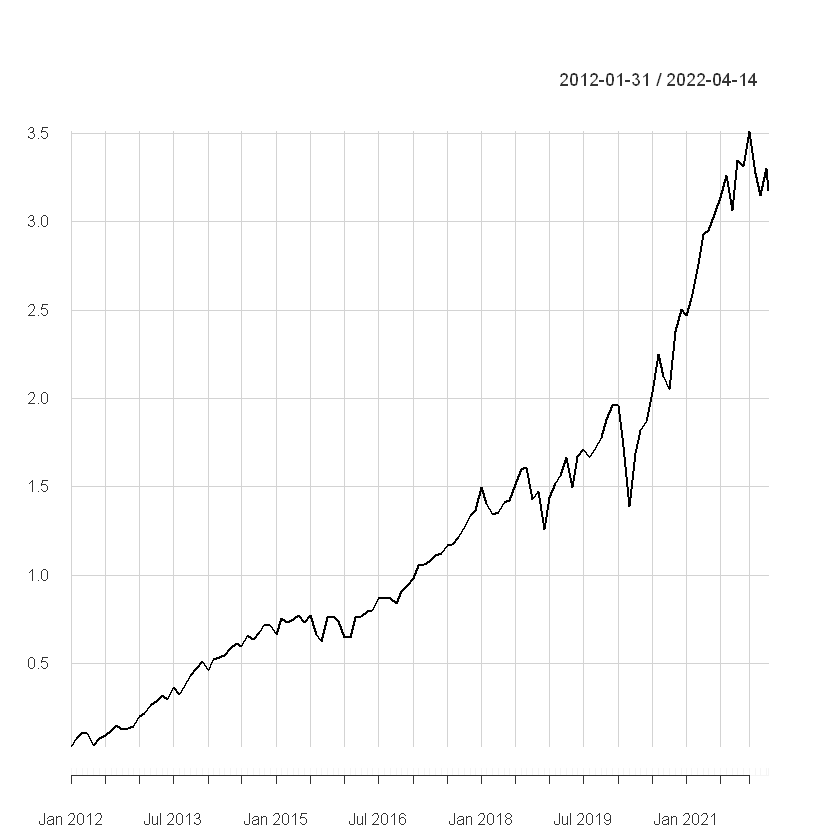

In [17]:
Indecies <- c("SPY")
wts <- c(1)
res <- portfolio_return(Indecies, wts)
portfolio_cum_return(res, Initial_investment)

In [18]:
stock_prices <- c("SPY") %>%
  tq_get(get  = "stock.prices")
  
# stock_prices

library(tidyverse)
stock_returns_monthly <- stock_prices %>%
  group_by(symbol) %>%
  tq_transmute(select     = adjusted, 
               mutate_fun = periodReturn, 
               period     = "monthly", 
               col_rename = "Ra")

wts <- c(1)

portfolio_returns_monthly <- stock_returns_monthly %>%
  tq_portfolio(assets_col  = symbol, 
               returns_col = Ra, 
               weights     = wts, 
               col_rename  = "Ra")

,Ra
Cumulative Return,3.171383


[1] 41713.83

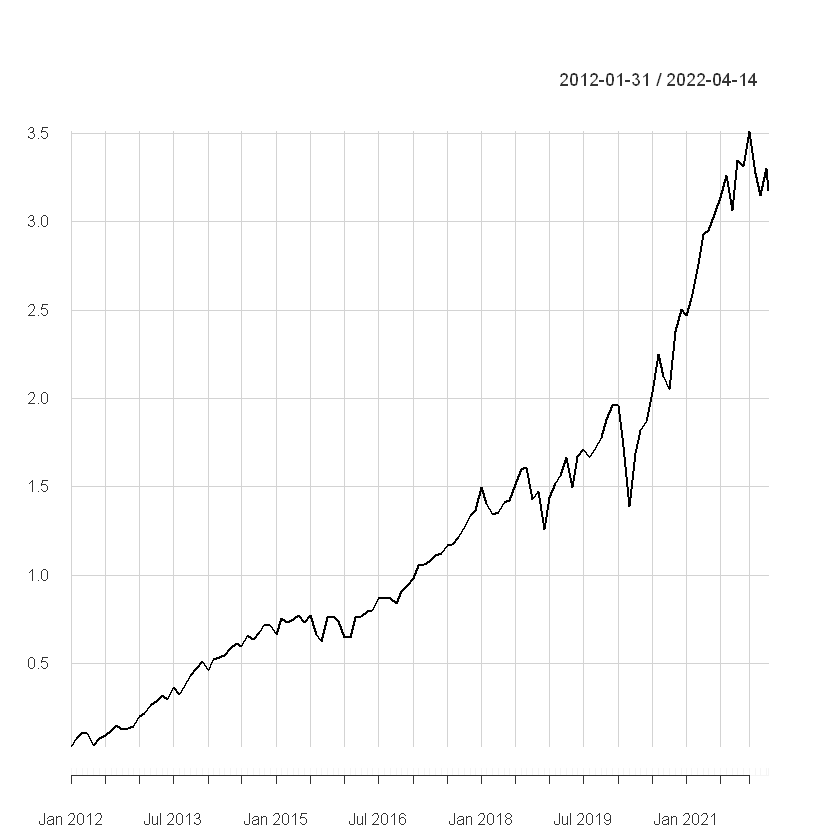

In [19]:
prm <- portfolio_returns_monthly
# portfolio1_returns_monthly$date <- mdy(portfolio1_returns_monthly$date) 
prm<- prm[order(prm$date),]
#create an xts dataset  
All.dat <- xts(prm[,-1], order.by = prm$date) 
#Calculate Compound Return for the fund across all the data  
Return.cumulative(All.dat$Ra,geometric = TRUE) 
cum_ret <- Return.cumulative(All.dat$Ra,geometric = TRUE)[1]
chart.CumReturns(All.dat$Ra,wealth.index = FALSE, geometric = TRUE)  
10000 * (1+cum_ret) 